# Module 1 - Visualizations: Seaborn


## Visualization Part II

#### Our goals today are to be able to: 

Use the Seaborn library to:

- EDA



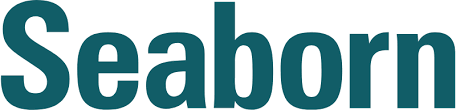

In [1]:
# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'
import pandas as pd
import numpy as np
df = pd.read_csv('heart.csv')

In [2]:
df.head().T

,0,1,2,3,4
age,63.0,37.0,41.0,56.0,57.0
sex,1.0,1.0,0.0,1.0,0.0
cp,3.0,2.0,1.0,1.0,0.0
trestbps,145.0,130.0,130.0,120.0,120.0
chol,233.0,250.0,204.0,236.0,354.0
fbs,1.0,0.0,0.0,0.0,0.0
restecg,0.0,1.0,0.0,1.0,1.0
thalach,150.0,187.0,172.0,178.0,163.0
exang,0.0,0.0,0.0,0.0,1.0
oldpeak,2.3,3.5,1.4,0.8,0.6


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### Seaborn

Now, let's move on to the Seaborn library. Deaborn is essentially a higher-level API based on the matplotlib library. Among other things, it differs from the latter in that it contains more adequate default settings for plotting. By adding import seaborn as sns; sns.set() in your code, the images of your plots will become much nicer. Also, this library contains a set of complex tools for visualization that would otherwise (i.e. when using bare matplotlib) require quite a large amount of code.

#### pairplot()

Let's take a look at the first of such complex plots, a pairwise relationships plot, which creates a matrix of scatter plots by default. This kind of plot helps us visualize the relationship between different variables in a single output.
- The distribution histograms lie on the diagonal of the matrix.
- The remaining charts are scatter plots for the corresponding pairs of features.

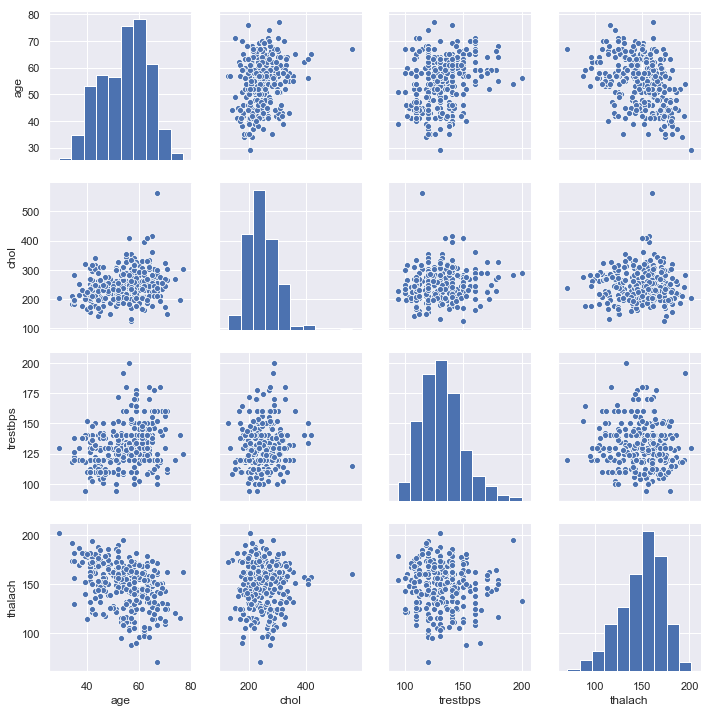

In [5]:
sns.pairplot(df[['age', 'chol', 'trestbps', 
                 'thalach']]);

#### distplot()

It is also possible to plot a distribution of observations with seaborn's distplot(). For example, let's look at the distribution of resting heart beat. By default, the plot displays a histogram and the kernel density estimate.

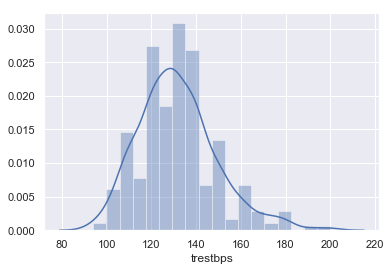

In [6]:
sns.distplot(df['trestbps']);

#### jointplot()

To look more closely at the relationship between two numerical variables, you can use joint plot, which is a cross between a scatter plot and histogram. Let's see how the age and chol features are related.

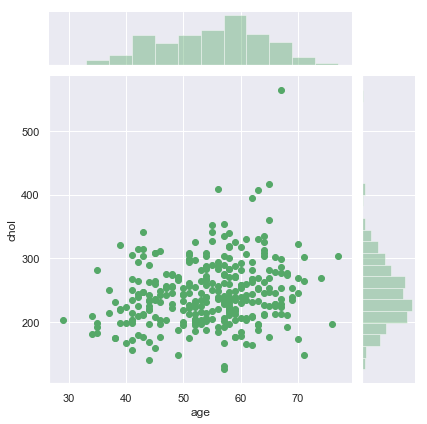

In [7]:
sns.jointplot(x='age', y='chol', data=df, kind='scatter', color="g");
#sns.jointplot(x='age', y='chol', data=df, kind='reg', color="g");

#### lmplot

- let's see how the input variables are related to the target variable.

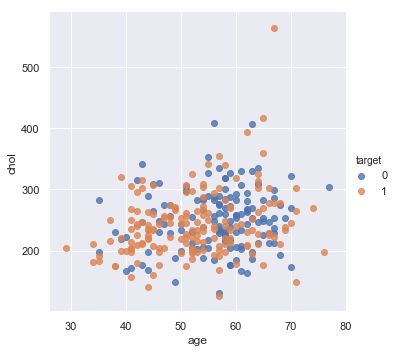

In [60]:
sns.lmplot('age', 'chol', data=df, hue='target', fit_reg=False);
#sns.lmplot('age', 'chol', data=df, hue='target', fit_reg=True);

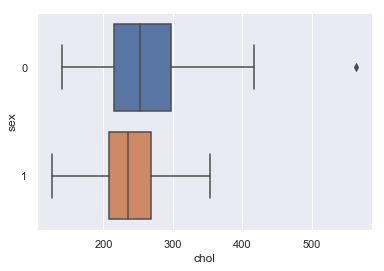

In [65]:
sns.boxplot(y="sex", x="chol", data=df, orient="h");

#### How to interpret a box plot.

Its components are a box, the so-called whiskers, and a number of individual points (outliers).

The box by itself illustrates the interquartile spread of the distribution; its length determined by the  25%(Q1)  and  75%(Q3)  percentiles. The vertical line inside the box marks the median ( 50% ) of the distribution.

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval  (Q1−1.5⋅IQR,Q3+1.5⋅IQR) , where  IQR=Q3−Q1  is the interquartile range.

Outliers that fall out of the range bounded by the whiskers are plotted individually.

#### Violion Plot

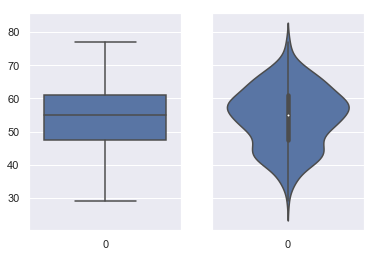

In [61]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['age'], ax=axes[0]);
sns.violinplot(data=df['age'], ax=axes[1]);

The difference between the box and violin plots is that the former illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole.



#### heatmap()


The last type of plot that we will cover here is a heat map. A heat map allows you to view the distribution of a numerical variable over two categorical ones. Let’s visualize the total sales of games by genre and gaming platform.

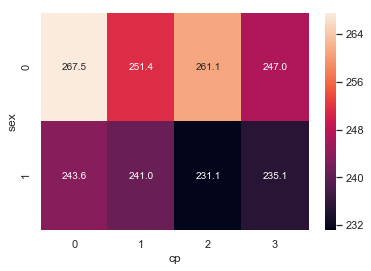

In [23]:
# Plot a dataframe with meaningful row and column labels:
data = df.pivot_table(index='sex', columns='cp', values='chol')
sns.heatmap(data, annot=True, fmt=".1f");


### Plotly

We have examined some visualization tools based on the matplotlib library. However, this is not the only option for plotting in Python. Let’s take a look at the plotly library. Plotly is an open-source library that allows creation of interactive plots within a Jupyter notebook without having to use Javascript.

In [27]:
pip install plotly==3.10.0

    100% |████████████████████████████████| 41.5MB 663kB/s ta 0:00:011
  Stored in directory: /Users/hsmith2/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [69]:
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [70]:
trace0 = go.Scatter(
    x=df.index,
    y=df['age'],
    name='age'
)
trace1 = go.Scatter(
    x=df.index,
    y=df['chol'],
    name='cholestrol'
)

# Define the data array
data = [trace0,trace1]

# Set the title
layout = {'title': 'Cholestrol and Age'}

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=True)

In [71]:
plotly.offline.plot(fig, filename='age_chol.html', show_link=False);